## Introduction

The goal of this project is to perform exploratory data analysis on the Crimes Report Dataset. 

This project will  explore, prepare data, analyze, plot data, and seek to explain the findings from the analysis.

Here are a few questions that this project has sought to answer:

- Which are the 5 Offence Groups that is contributing to the most crimes and least crimes in the dataset?
- In which year were the most crimes committed?
- Which is the most dangerous hour of the day in each day of week?
- What is the Average number of crimes in a month and which month had the most crimes for each year?
- Which district contributed to the most crimes each year?

**Data sources:**

We will use the `crime.csv` for this project which will be provided along with the Jupyter notbook files

## Import Python Modules

First, let us import the python modules that will be used in this project:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from encodings.aliases import aliases

# the matplotlib plots will appear directly below the cell in which the plot function was called.
%matplotlib inline

## Loading the Data

To analyze the crimes dataset, we will load the datasets into a `DataFrame`. Once loaded as a  `DataFrame` the data can be explored and visualized with Python.

In the next steps, we will find the  suitable encoding for the `crimes.csv` file and read in as a `DataFrame` called `crimes_df`.

In [2]:
#Different files have different compatible encodings. Using the below code we find a suitable encoding for our file 
for encoding in set(aliases.values()):
    try:
        crimes_df = pd.read_csv("crime.csv", nrows=10, encoding=encoding) # read in only 10 lines for faster read
        print('successful', encoding)
    except:
        pass

successful cp857
successful latin_1
successful cp858
successful iso8859_5
successful cp1256
successful utf_16_le
successful iso8859_15
successful hp_roman8
successful iso8859_10
successful iso8859_13
successful cp855
successful cp932
successful cp037
successful cp869
successful iso8859_2
successful utf_16_be
successful iso8859_16
successful cp1026
successful cp866
successful iso8859_8
successful cp775
successful cp865
successful cp273
successful mac_turkish
successful cp860
successful iso8859_4
successful cp1257
successful cp864
successful mac_cyrillic
successful iso8859_3
successful cp861
successful cp850
successful cp500
successful cp1258
successful mac_roman
successful cp1251
successful big5hkscs
successful iso8859_6
successful mac_greek
successful cp1255
successful cp1253
successful mac_latin2
successful iso8859_11
successful cp437
successful cp1250
successful cp852
successful cp1140
successful cp1254
successful gb18030
successful cp862
successful cp863
successful cp949
successful 

In [3]:
#Using one of the above endcodings, we will read the csv file into a Pandas Dataframe
crimes_df = pd.read_csv("crime.csv", encoding="ISO-8859-11")

## Explore and Cleaning of Data
In this Section we will clean the data to prepare it for analysis and Explore a few aspects of the Data set

We will take a quick glimse of the `crimes.df` data frame using the `.head()` and `.tail()` functions and understand the different columns using the `.columns()` function

In [4]:
#Provides us with the first 5 rows of the 
crimes_df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [5]:
#We will also look at the bootom few rows of the dataset
crimes_df.tail()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"
319072,142052550,3125,Warrant Arrests,WARRANT ARREST,D4,903,NaN,2015-06-22 00:12:00,2015,6,Monday,0,Part Three,WASHINGTON ST,42.333839,-71.080290,"(42.33383935, -71.08029038)"


In [6]:
#Provides the list of Columns of the Dataset
crimes_df.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

Next, we will check the Dimensions of the Data set using the `.shape()` function. We observe that it has ` 319,073 rows` and `17 columns`

In [7]:
crimes_df.shape

(319073, 17)

Lets us check for any duplicate values in the Dataset using the `.duplicate()` function and find the total rows by chaining the `.sum()` function.


We observe that there are 23 Duplicate rows

In [8]:
crimes_df.duplicated().sum()

23

Since Duplicate rows are unnecessary, we will drop those using the `drop_duplicates()` function

In [9]:
crimes_df.drop_duplicates(inplace=True)
#Now let us check the new number of rows using the shape fucntion

crimes_df.shape

(319050, 17)

Now, we will use the Overall Description of the dataset using the `.info()` function

In [10]:
crimes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319050 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319050 non-null  object 
 1   OFFENSE_CODE         319050 non-null  int64  
 2   OFFENSE_CODE_GROUP   319050 non-null  object 
 3   OFFENSE_DESCRIPTION  319050 non-null  object 
 4   DISTRICT             317285 non-null  object 
 5   REPORTING_AREA       319050 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319050 non-null  object 
 8   YEAR                 319050 non-null  int64  
 9   MONTH                319050 non-null  int64  
 10  DAY_OF_WEEK          319050 non-null  object 
 11  HOUR                 319050 non-null  int64  
 12  UCR_PART             318960 non-null  object 
 13  STREET               308179 non-null  object 
 14  Lat                  299052 non-null  float64
 15  Long             

Above, it can be observed that the `OCCURRED_ON_DATE` column is of object type. We will convert it to `Datetime` so that we can extra specific information from it.

In [11]:
crimes_df.OCCURRED_ON_DATE = pd.to_datetime(crimes_df.OCCURRED_ON_DATE)

#We will verify our changes
crimes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319050 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   INCIDENT_NUMBER      319050 non-null  object        
 1   OFFENSE_CODE         319050 non-null  int64         
 2   OFFENSE_CODE_GROUP   319050 non-null  object        
 3   OFFENSE_DESCRIPTION  319050 non-null  object        
 4   DISTRICT             317285 non-null  object        
 5   REPORTING_AREA       319050 non-null  object        
 6   SHOOTING             1019 non-null    object        
 7   OCCURRED_ON_DATE     319050 non-null  datetime64[ns]
 8   YEAR                 319050 non-null  int64         
 9   MONTH                319050 non-null  int64         
 10  DAY_OF_WEEK          319050 non-null  object        
 11  HOUR                 319050 non-null  int64         
 12  UCR_PART             318960 non-null  object        
 13  STREET        

Now we can easily extract information like week,the exact minute of the crime, etc.

In [12]:
#This provides the week of the year the crime took place 
crimes_df.OCCURRED_ON_DATE.dt.isocalendar().week

0         35
1         34
2         36
3         36
4         36
          ..
319068    22
319069    28
319070    28
319071    22
319072    26
Name: week, Length: 319050, dtype: UInt32

In [13]:
#This shows the exact minute the crime took place
crimes_df.OCCURRED_ON_DATE.dt.minute

0          0
1          0
2         27
3         16
4          5
          ..
319068    25
319069    38
319070    38
319071    35
319072    12
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int64

Next we can get the summary of the numeric columns of the dataset like maximum value of the column or mean of the column using `.describe()` function

In [14]:
crimes_df.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,319050.000000,319050.000000,319050.000000,319050.000000,299052.000000,299052.000000
mean,2317.516957,2016.560674,6.609622,13.118176,42.214373,-70.908260
std,1185.308921,0.996312,3.273677,6.294258,2.159845,3.493746
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297438,-71.097135
50%,2907.000000,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


For our Analysis, column `Location` is redundant and unecessary as columns `LAT` and `LONG` provides the same infromation , so let us drop the `LOCATION` column

We can achieve this using the `drop()` function

In [15]:
crimes_df.drop(columns=['Location'], inplace=True)

#We can verify the changes now
crimes_df

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565


Null values or Empty values are not suitable while perfmoring data analysis.

First let us check, which columns have null values. It can be observed that columns 

- District
- Shooting
- UCR Part
- Street
- Lat
- Long 

have null values

In [16]:
#Displays an array of columns with null values
crimes_df.columns[np.sum(crimes_df.isnull()) != 0]

Index(['DISTRICT', 'SHOOTING', 'UCR_PART', 'STREET', 'Lat', 'Long'], dtype='object')

We will take one step furthur and find the number of missing values in the above columns

In [17]:
crimes_df[crimes_df.columns[np.sum(crimes_df.isnull()) != 0]].isnull().sum()

DISTRICT      1765
SHOOTING    318031
UCR_PART        90
STREET       10871
Lat          19998
Long         19998
dtype: int64

From the Data set we can see that null values in the `Shooting Column` indicate that the crime did not involve shooting. To make the Column more meaningfull, we will replace all the null values as `N`

In [18]:
crimes_df.loc[crimes_df.SHOOTING.isnull(),'SHOOTING'] = 'N'
print("Dataframe after modicifation")
crimes_df

Dataframe after modicifation


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,N,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371
1,I182070943,1402,Vandalism,VANDALISM,C11,347,N,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,N,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,N,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,N,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,N,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,N,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,N,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,N,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565


We can also notice below that `SHOOTING` column no longer contains null values

In [19]:
crimes_df.columns[np.sum(crimes_df.isnull()) != 0]

Index(['DISTRICT', 'UCR_PART', 'STREET', 'Lat', 'Long'], dtype='object')

Lastly, Lets find the number of distinct types of crimes groups(OFFENSE_CODE_GROUP) in the data. We can use the `OFFENSE_CODE_GROUP` column and the `nunique()` function. We observe that there are 67 distinct code groups 

In [20]:
print(f"number of distinct crime groups:{crimes_df.OFFENSE_CODE_GROUP.nunique()}")

number of distinct crime groups:67


# Analysis

This section we will begin analyzing the data after the initial exploration and answer a few questions. We will also plot appropriate graphs using `Matplotlib` and `Seaborn`


#### ***Question 1. Which are the 5 Offence Groups that is contributing to the most crimes and least crimes?***

In [21]:
#Provides the 10 most common crime groups
crimes_df.OFFENSE_CODE_GROUP.value_counts()[:5]

Motor Vehicle Accident Response    37132
Larceny                            25935
Medical Assistance                 23540
Investigate Person                 18749
Other                              18073
Name: OFFENSE_CODE_GROUP, dtype: int64

In [22]:
#Provides the 10 least common crime groups
crimes_df.OFFENSE_CODE_GROUP.value_counts().sort_values(ascending=True)[:5]

Burglary - No Property Taken                 2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE    2
Biological Threat                            2
INVESTIGATE PERSON                           4
HUMAN TRAFFICKING                            7
Name: OFFENSE_CODE_GROUP, dtype: int64

Now, let us get a beautiful vizualization of the above data

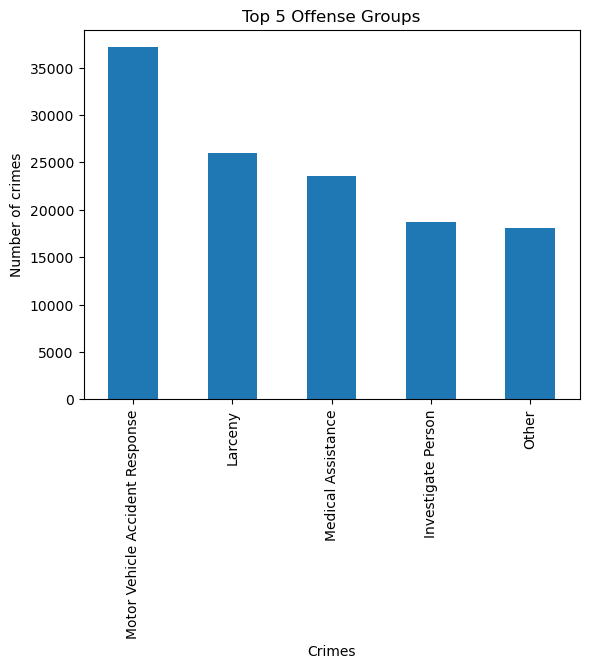

In [23]:
# Creating a bar chart of the Top 5 offense groups
plt.title('Top 5 Offense Groups');
plt.xlabel("Crimes")
plt.ylabel('Number of crimes')
(crimes_df.OFFENSE_CODE_GROUP.value_counts()[:5]).plot(kind='bar');

***INFERENCE***

From the above, we can gather that the 5 most common offense groups are :
- Motor Vehicle Accident Response 
- Larceny                        
- Medical Assistance                 
- Investigate Person                 
- Other             

And the 5 least offense groups are :
- Burglary - No Property Taken                  
- HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE     
- Biological Threat                             
- INVESTIGATE PERSON                            
- HUMAN TRAFFICKING    

#### ***Question 2. In which year were the most crimes committed?***

In [24]:
#We will get the number of crimes committed in each distinct year present in the dataset
crimes_df.groupby("YEAR").count()['INCIDENT_NUMBER']

YEAR
2015     53371
2016     99110
2017    100884
2018     65685
Name: INCIDENT_NUMBER, dtype: int64

Now, similar to the first question, we will vizualize this information using a Bar plot

<Axes: xlabel='YEAR'>

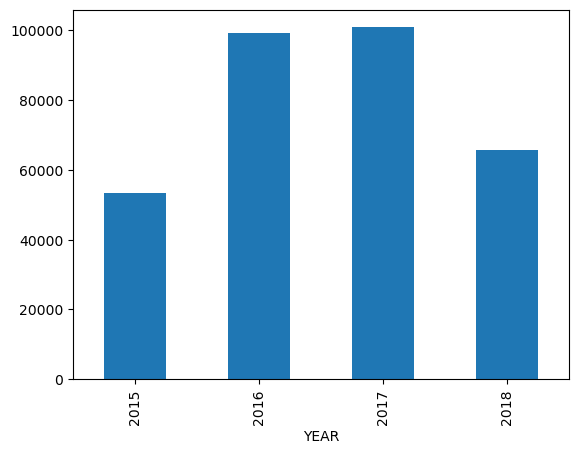

In [25]:
crime_by_year = crimes_df.groupby("YEAR").count()['INCIDENT_NUMBER']
#Plots a line graph
crime_by_year.plot(kind='bar')

<Axes: xlabel='YEAR'>

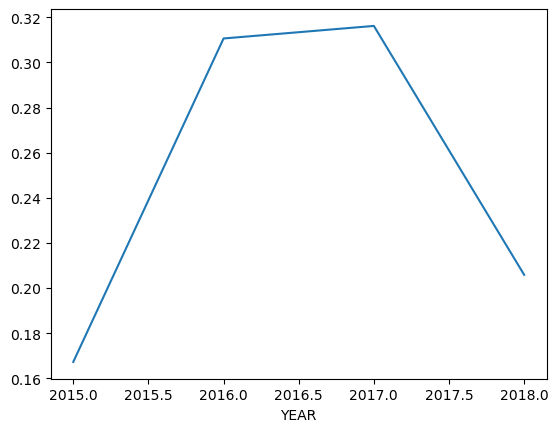

In [26]:
#This will plot a line graph for the crime rate
(crime_by_year/ crimes_df.shape[0]).plot(kind='line')

We will take one step furthur and find out which is the Top crime group in each year

In [27]:
#Iterate through each year to find the most common Offense code group
for crime_year in crimes_df.YEAR.unique():
    print("The most common crime in year "+ str(crime_year))
    display(crimes_df[crimes_df.YEAR==crime_year].OFFENSE_CODE_GROUP.value_counts()[:1]);

The most common crime in year 2018


Motor Vehicle Accident Response    7722
Name: OFFENSE_CODE_GROUP, dtype: int64

The most common crime in year 2017


Motor Vehicle Accident Response    12049
Name: OFFENSE_CODE_GROUP, dtype: int64

The most common crime in year 2016


Motor Vehicle Accident Response    11534
Name: OFFENSE_CODE_GROUP, dtype: int64

The most common crime in year 2015


Motor Vehicle Accident Response    5827
Name: OFFENSE_CODE_GROUP, dtype: int64

***INFERENCE***

The `Year 2017` had the most Crimes. We can also infere from the line graph that the crime rate has increased drastically over the years 2016 and 2017 and then decreased in the year 2018. Laslty, Motor Vehicle Accident Response has been the most common crime group every year.

#### ***Question 3. Which is the most dangerous hour of the day in each day of week?***

In [28]:
#To calculate the most dangerous hour of the day when most crimes were commited over the course of 4 years
crimes_df.groupby('HOUR').count()['INCIDENT_NUMBER'].sort_values(ascending=False)

HOUR
17    20762
18    20301
16    19870
12    18676
19    17587
14    17189
13    16845
15    16519
11    16445
10    16345
20    15849
0     15106
9     14740
21    14109
8     13042
22    12925
23    10596
1      9267
7      8850
2      7693
6      5026
3      4589
4      3408
5      3311
Name: INCIDENT_NUMBER, dtype: int64

Now, we will plot a bar graph to understand the above information better

<Axes: xlabel='HOUR'>

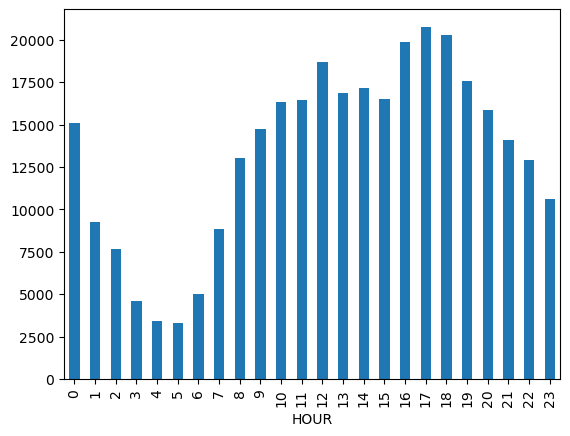

In [29]:
(crimes_df.groupby('HOUR').count()['INCIDENT_NUMBER']).plot(kind = 'bar')

In [30]:
#This will find the day of the week with most crimes
crimes_df.groupby('DAY_OF_WEEK').count()['INCIDENT_NUMBER'].sort_values(ascending=False)

DAY_OF_WEEK
Friday       48489
Wednesday    46727
Thursday     46655
Tuesday      46376
Monday       45674
Saturday     44816
Sunday       40313
Name: INCIDENT_NUMBER, dtype: int64

<Axes: xlabel='DAY_OF_WEEK'>

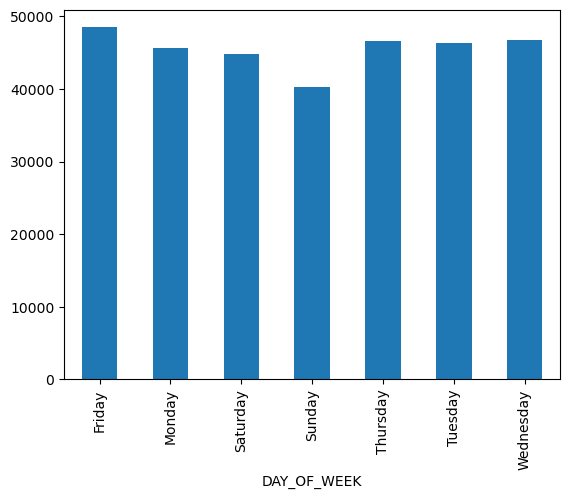

In [31]:
(crimes_df.groupby('DAY_OF_WEEK').count()['INCIDENT_NUMBER']).plot(kind = 'bar')

Now, we bring together both the parameter to answer our initial question

In [32]:
#Will dispaly a matrix with crimes at every hour during the day for every day of the week
crimes_df.groupby(['HOUR','DAY_OF_WEEK']).count()['INCIDENT_NUMBER'].unstack()

DAY_OF_WEEK,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
HOUR,,,,,,,
0,2161,2000,2612,2400,2039,1897,1997
1,1275,1058,1855,2043,1077,1017,942
2,952,846,1827,1855,774,641,798
3,532,583,957,1119,526,460,412
4,441,386,672,704,436,399,370
5,485,417,478,517,508,462,444
6,768,709,530,543,866,787,823
7,1398,1352,1078,758,1405,1418,1441
8,2041,2046,1515,1123,2037,2145,2135


In [33]:
crimestemp_df = crimes_df.groupby(['HOUR','DAY_OF_WEEK']).count()['INCIDENT_NUMBER'].unstack()
#Retrieves the index of the maximum values in each column()
crimestemp_df.idxmax()

DAY_OF_WEEK
Friday       17
Monday       17
Saturday      0
Sunday        0
Thursday     18
Tuesday      17
Wednesday    17
dtype: int64

We can express the same using a Heatmap to give a better representation visually.

<Axes: xlabel='DAY_OF_WEEK', ylabel='HOUR'>

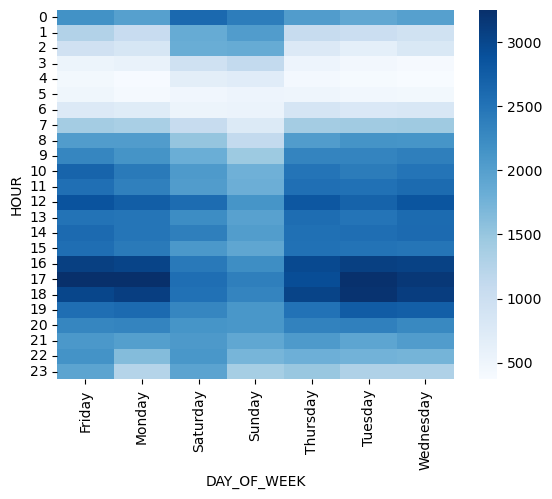

In [34]:
sns.heatmap(crimestemp_df,fmt="d", cmap='Blues')

***INFERENCE***

From the above the data, we can infer that :
- On Monday, Hour 17(5 pm) is the most dangerous
- On Tuesday, Hour 17(5 pm) is the most dangerous
- On Wednesday, Hour 17(5 pm) is the most dangerous
- Thursday, Hour 18(6 pm) is the most dangerous
- On friday, Hour 17(5 pm) is the most dangerous
- On Saturday and Sunday, Hour 0(12 am) is the most dangerous

Overall, Hours 16, 17 and 18 are the most dangerous as the heatmap has a dark blue shade during those hours on the `Heatmap`.


#### ***Question 4. What is the Average number of crimes in a month and which month had the most crimes for each year?***

In [35]:
#Prints the average number of crimes
print("The average number of crimes : " + str(crimes_df.groupby(['MONTH','YEAR']).count()['INCIDENT_NUMBER'].mean()))

The average number of crimes : 7976.25


Next, let us display the total number of crimes for each month for all 4 years and use this data to find the month with most crimes in each year.

In [36]:
crimes_df.groupby(['MONTH','YEAR']).count()['INCIDENT_NUMBER'].unstack()

YEAR,2015,2016,2017,2018
MONTH,,,,
1,NaN,7835.0,7991.0,7782.0
2,NaN,7307.0,7408.0,6937.0
3,NaN,8199.0,8179.0,7768.0
4,NaN,8101.0,8069.0,7916.0
5,NaN,8578.0,8715.0,8906.0
6,4188.0,8558.0,8985.0,8834.0
7,8322.0,8618.0,9075.0,8538.0
8,8340.0,8938.0,9206.0,8337.0
9,8411.0,8521.0,8940.0,667.0


Using the above table, we will extract the month with highest number of crimes from each year

In [37]:
crime_month = crimes_df.groupby(['MONTH','YEAR']).count()['INCIDENT_NUMBER'].unstack()
crime_month.idxmax()

YEAR
2015    9
2016    8
2017    8
2018    5
dtype: int64

***INFERENCE*** 

From the above information, we can conclude that the average crime per month is `7976.25` crimes. 

In `2015`, `September` month had the most crimes with `8411` crimes.

In `2016`, `August` month had the most crimes with `8938` crimes.

In `2017`, `August` month had the most crimes with `9206` crimes.

In `2018`, `May` month had the most crimes with `8906` crimes.

#### ***Question 5. Which district contributed to the most crimes each year?***

First, we will visialize the overall crimes in each district in the Dataset. We observe below that District B2 contributed to the most crimes.

<Axes: xlabel='DISTRICT'>

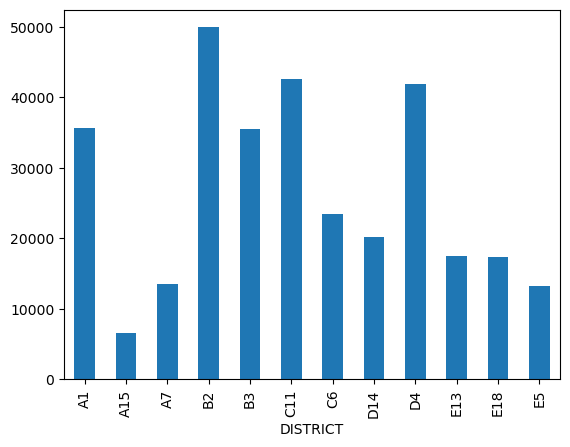

In [38]:
(crimes_df.groupby("DISTRICT").count()['INCIDENT_NUMBER']).plot(kind='bar')

Now, we will analyze it based on each year

In [39]:
#Provides the data of total crimes per district per years
crimes_df.groupby(['DISTRICT', 'YEAR']).count()['INCIDENT_NUMBER'].unstack()

YEAR,2015,2016,2017,2018
DISTRICT,,,,
A1,6010,10922,11374,7404
A15,1027,1986,2167,1325
A7,2426,4130,4264,2724
B2,8682,15706,15680,9872
B3,5616,11145,11195,7485
C11,7363,13602,13281,8282
C6,3939,7072,7247,5199
D14,3280,6279,6509,4059
D4,7203,12953,13157,8601


Now, we will use the above data to find the district with maximum crimes each year

In [40]:
crime_district = crimes_df.groupby(['DISTRICT', 'YEAR']).count()['INCIDENT_NUMBER'].unstack()
crime_district.idxmax()

YEAR
2015    B2
2016    B2
2017    B2
2018    B2
dtype: object

Next, lets plot a Heatmap to vizualize the above data 

<Axes: xlabel='YEAR', ylabel='DISTRICT'>

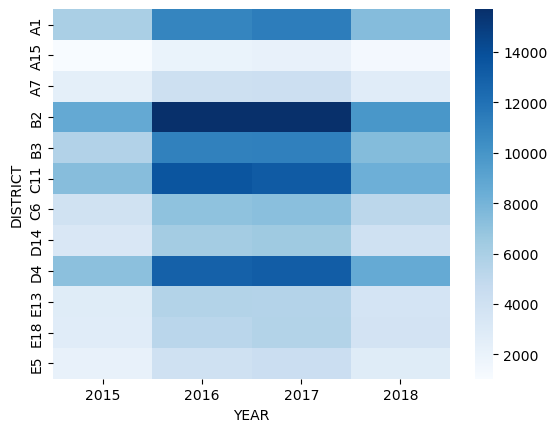

In [41]:
sns.heatmap(crime_district, fmt="d", cmap='Blues')

***INFERENCE*** 

Every year, District `B2` has been contributing to the highest number of crimes. 

# Conclusions

Through this project, I was able to explore the huge dataset of crimes while gaining valuable insights and plotting attractive vizualizations

During this process i was also able to answer a few questions posed in the beginning:

- Which are the 5 Offence Groups that is contributing to the most and least number of crimes
    - The 5 offense groups contributing to the most crimes are Motor Vehicle Accident Response, Larceny, Medical Assistance, Investigate Person and other (Miscellaneous)
    - The 5 offense groups contributing to the least crimes are Burglary - No Property Taken, Human Trafficking - Involuntary servitude, Biological Threat, Inverstigate person  and Human Trafficking.
- In which year were the most crimes committed?
    - The  most number of crimes were contributed during the `Year 2017` and 'Motor Vehicle Accident' has been the most common crime group every year.
- Which is the most dangerous hour of the day in each day of week?
    - Overall, `hours 12, 17 and 18`` are the most dangerous hours during the weel
- What is the Average number of crimes in a month and which month had the most crimes for each year?
    - The average crime per month is `7976.25` crimes. In `2015`, `September` month had the most crimes, in `2016` and `2017` `August` month had most crimes and in `2018`, `May` month had the most crimes
- Which district contributed to the most crimes each year?
    -  Every year, District B2 contributes to highest number of crimes.

# THANK YOU